# Wine

This set contains data about wine

* Fixed Acidity most acids  involved with wine or fixed or nonvolatile
* Volatile Acidity -- the amount of acetic in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
* citric acid -- found in small quantities, citric acid can add 'freshness' and flavor to wines
* residual sugar -- the amount of sugar remaining after fermentation stops, it is rare to find wine with less than 1 gram/liter.
* chlorides -- the amount of salt in the wine
* free sulfur dioxide -- the free form of SO2 exists in equilibrium between molecular S02 and bisulfite ion.
* total sulfur dioxide 
* density -- the density of water is close to that of water depending on the percent alcohol and sugar content.
* ph -- describes how acidic or basic a wine is on a scale from 0 to 14.
* sulphates a wine additive which can contruibute to sulfur dioxide gas level.
* alcohol -- the percent alcohol content of the wine.
* label appeal -- The description we were given for this field was "subjective marketing score that indicates the appeal of the design of the label on the bottle".
* acid index -- acid index is calculated by subtracting the pH from the Total Acidity (TA).
* Stars -- wine rating as determined by experts (4 = excellent; 1 = poor)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/quiz/wine_data.csv')

original_df = df.copy()
df.drop('INDEX',axis = 1,inplace=True)
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


From the above output, it is very unclear that some columns have negative values, and also some columns are named in a confusing way. Another thing is that these data have not been normalized or standardized.
Maybe turn negative value into positive value, we assueming negative value is not allow in this data set.

In [2]:
# rename some columns' name to make more sense

df = df.rename(columns={'TARGET':'#winesSold','STARS':'Rating'})
df.head()

,#winesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
# count how many negative value
cirtic = df.loc[df['CitricAcid'] <= 0,'CitricAcid'].count()
volatile = df.loc[df['VolatileAcidity'] == 0, 'VolatileAcidity'].count()
chlorides = df.loc[df['Chlorides'] > 0,'Chlorides'].count()

print(cirtic, "\t", volatile, '\t',chlorides)

3081 	 18 	 8955


In [4]:
# turn all data into positive
df = abs(df)

In [5]:
# check how many null are there 
df.isnull().sum()

#winesSold               0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
Rating                3359
dtype: int64

From the above, it shows there are many missing value in some of the columns. Later have to perform some data cleaning.

In [6]:
#check data types
df.dtypes

#winesSold              int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
Rating                float64
dtype: object

## EDA 

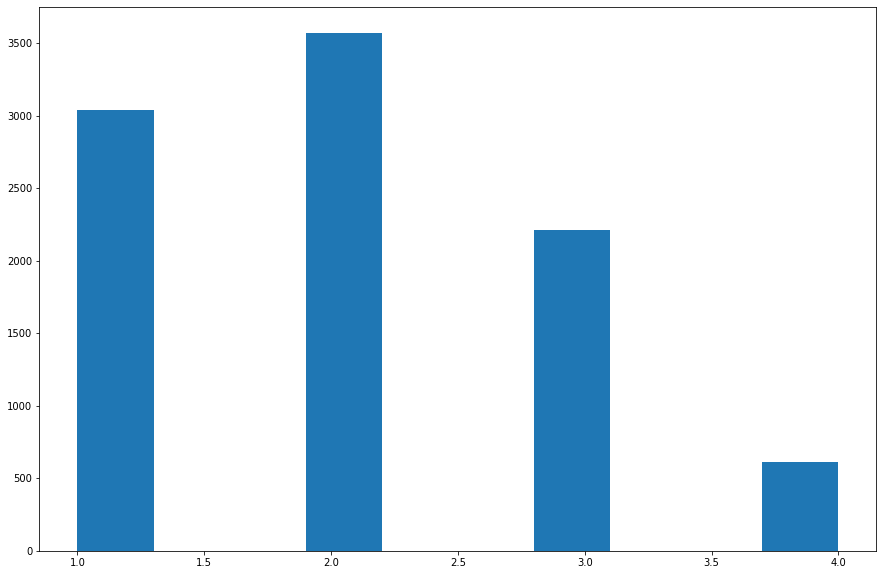

In [7]:
# see the most frequent rating for wines
plt.figure(figsize=(15,10))
plt.hist(df['Rating'])
plt.show()

**Most wines have a rating of 2.0, and fewer wines have a rating of around 4** 

Most wines are average, but second, most wines' ratings are 1.0 which is below the average.

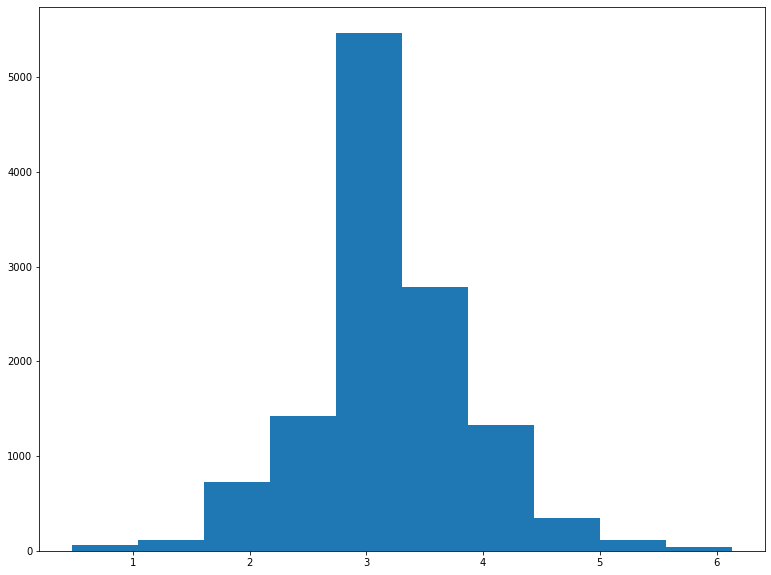

In [8]:
# see the most frequent ph value 
plt.figure(figsize=(13, 10))
plt.hist(df['pH'])
plt.show()

**About 6k wines has around 3.0 PH value that is in standard range**

We can tell the ph value of wine by looking at the color. if the color wine is dull red that means it has very high ph value. The wine with a high ph-value always is described as mild. 

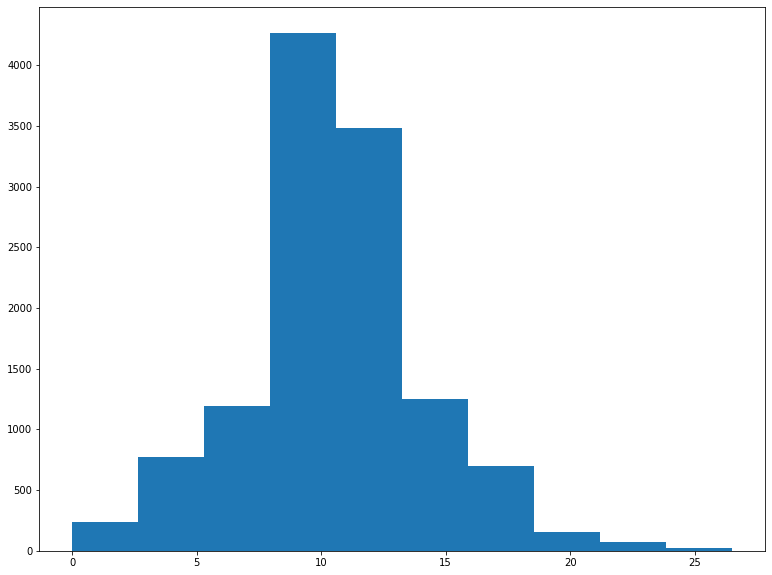

In [9]:
# to see most appears alcohol value
plt.figure(figsize=(13, 10))
plt.hist(df['Alcohol'])
plt.show()


**The lowest alcohol value can be 5.5 and the highest alcohol can be over 20 in wines**

From the above graph, in this data set most wines have alcohol value around 10 range. Usually alcohol value will affect density value.

In [10]:
# to see min max men median value for each features
df.describe()

,#winesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,0.638687,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.621425,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,0.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,1.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


From the above, there are several columns with a min value of 0 which is unclear. However, it is possible that wine may contain 0 ingredients of some attributes above.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


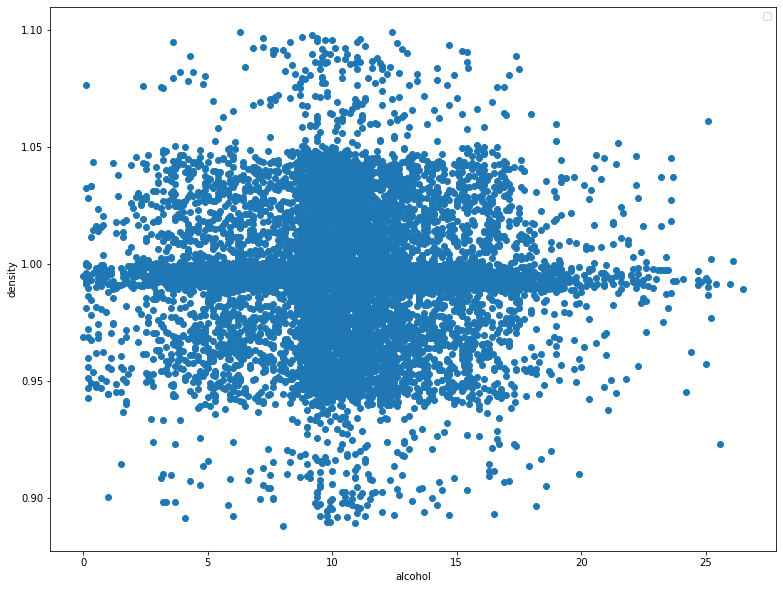

In [11]:
# to the relation between rating with alcohol
plt.figure(figsize=(13, 10))
plt.scatter(df['Alcohol'], df['Density'])
plt.ylabel('density')
plt.xlabel('alcohol')
plt.legend()
plt.show()

Most wines are in the range(10,1) which ratio is 10:1. It seems there are some wines that have high alcohol, which may be not good for wines.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


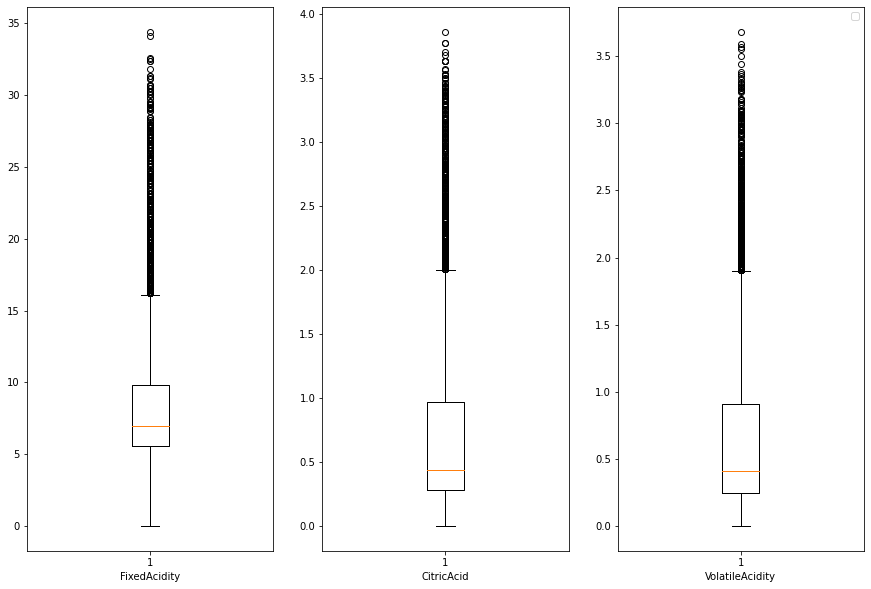

In [12]:
# to see outliar
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)

plt.boxplot(df['FixedAcidity'])
plt.xlabel('FixedAcidity')
plt.subplot(1, 3, 2)
plt.boxplot(df['CitricAcid'])
plt.xlabel('CitricAcid')
plt.subplot(1,3,3)
plt.boxplot(df['VolatileAcidity'])
plt.xlabel('VolatileAcidity')
plt.legend()
plt.show()

Fron the above boxplot, it shows that there are a lot of outliers.


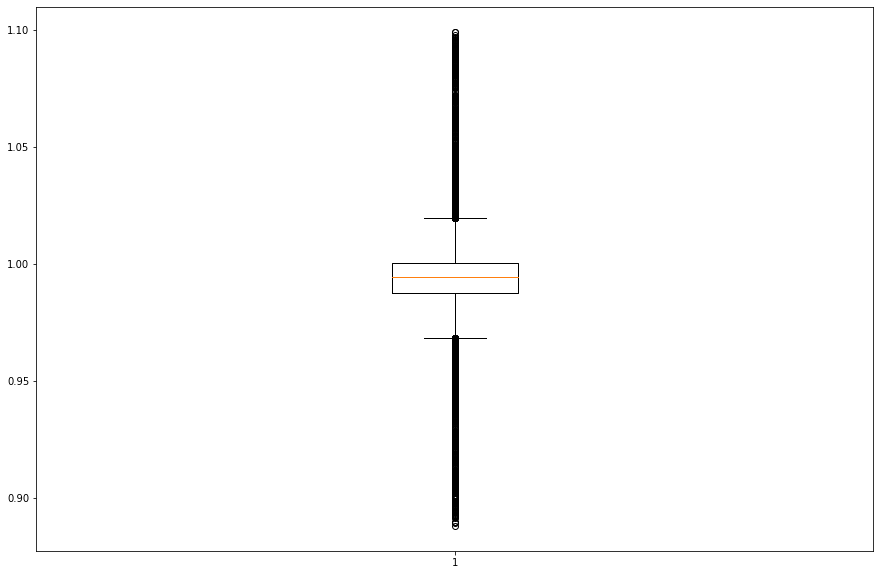

In [13]:
plt.figure(figsize=(15,10))
plt.boxplot(df['Density'])
plt.show()

It seems there are outliers in top range and bottom range


<AxesSubplot:>

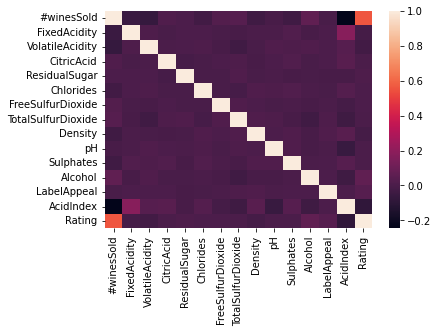

In [14]:
sns.heatmap(df.corr())

From the above graph, it shows only #winesSold has to do with Rating. Other features have no relation to each other.

### EDA Summary

There are many outliers in each attributes. Each attribute has no relation with any other attributes. There are some columns have min value as zero, which is acceptable in this data set.
The ratio for alcohol to density is 10 to 1.

## Data Preparation

In [15]:
# count how many unique value in each columns
columns = df.columns

for col in columns:
    print(f'{col} has ',df[col].unique().sum())

#winesSold has  36
FixedAcidity has  4710.3
VolatileAcidity has  735.86
CitricAcid has  607.5699999999999
ResidualSugar has  nan
Chlorides has  nan
FreeSulfurDioxide has  nan
TotalSulfurDioxide has  nan
Density has  5898.076445
pH has  nan
Sulphates has  nan
Alcohol has  nan
LabelAppeal has  3
AcidIndex has  147
Rating has  nan


In [16]:
# function that fill missing data by using scikit learn imputer
from sklearn.impute import SimpleImputer
def fill_missing_value(col,strategy):
    imputer = SimpleImputer(missing_values= np.nan,strategy=strategy)
    temp =imputer.fit_transform(df[col].to_numpy().reshape(-1,1))
    return pd.DataFrame(temp)

In [17]:
# call filling function to fill missing data
rate_col = fill_missing_value('Rating','median')
df['Rating'] = rate_col
sugar_col = fill_missing_value('ResidualSugar','median')
df['ResidualSugar'] = sugar_col
chlorides_col = fill_missing_value('Chlorides','median')
df['Chlorides'] = chlorides_col
freeSulfurDioxide_col = fill_missing_value('FreeSulfurDioxide','most_frequent')
df['FreeSulfurDioxide'] = freeSulfurDioxide_col
totalSulfurDioxide_col = fill_missing_value('TotalSulfurDioxide','most_frequent')
df['TotalSulfurDioxide'] = totalSulfurDioxide_col
ph_col = fill_missing_value('pH','mean')
df['pH'] = ph_col
sul_col = fill_missing_value('Sulphates','mean')
df['Sulphates'] = sul_col
alc_col = fill_missing_value('Alcohol','median')
df['Alcohol'] = alc_col

df['Rating']


0        2.0
1        3.0
2        3.0
3        1.0
4        2.0
        ... 
12790    2.0
12791    2.0
12792    2.0
12793    2.0
12794    2.0
Name: Rating, Length: 12795, dtype: float64

In the above, there are many missed values in some of the columns. So, I use SimpleImputer from scikit learn library to fill missing values. I use most frequent, median, and mean to fill missing value for those columns.

In [18]:
# wanna do some normalization in order to fit into machine learn model
# I will apply minmaxscaler to FixedAcidity VolatileAcidity CitricAcid attributes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['FixedAcidity'] = scaler.fit_transform(df['FixedAcidity'].to_numpy().reshape(-1,1))
df['VolatileAcidity'] = scaler.fit_transform(df['VolatileAcidity'].to_numpy().reshape(-1,1))
df['CitricAcid'] = scaler.fit_transform(df['CitricAcid'].to_numpy().reshape(-1,1))
df['Alcohol'] = scaler.fit_transform(df['Alcohol'].to_numpy().reshape(-1,1))
df['Density'] = scaler.fit_transform(df['Density'].to_numpy().reshape(-1, 1))
df.head()

,#winesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
0,3,0.093023,0.315217,0.253886,54.2,0.567,29.0,268.0,0.495903,3.33,0.59,0.373585,0,8,2.0
1,3,0.130814,0.043478,0.209845,26.1,0.425,15.0,327.0,0.662231,3.38,0.70,0.392453,1,7,3.0
2,5,0.206395,0.717391,0.227979,14.8,0.037,214.0,142.0,0.507175,3.12,0.48,0.830189,1,8,3.0
3,3,0.165698,0.104620,0.010363,18.8,0.425,22.0,115.0,0.512953,2.24,1.83,0.233962,1,6,1.0
4,4,0.232558,0.089674,0.326425,9.4,0.098,167.0,108.0,0.504286,3.12,1.77,0.516981,0,9,2.0


I use minmaxscaler to tranform data into a certain range. I did not pick binarizer method because it does not make sense to set a threshold in my opinion. After transforming data, data should be in a good range that can fit into machine model.

In [19]:
# apply binarizer method to Rating  and ,density,ph col

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=df['Rating'].mean())
binarizer_rate = binarizer.fit_transform(df['Rating'].to_numpy().reshape(-1,1))
binarizer_rate = pd.DataFrame(binarizer_rate.reshape(-1,1))
df['Rating'] = binarizer_rate



binarizer = Binarizer(threshold=df['pH'].mean())
binarizer_pH = binarizer.fit_transform(df['pH'].to_numpy().reshape(-1, 1))
binarizer_pH = pd.DataFrame(binarizer_rate)
df['pH'] = binarizer_pH




I use Binarizer method to turn the value into a smaller range by setting a threshold by its mean value. After transforming data, it should fit into a machine model.


#### Rerun EDA

Text(0.5, 1.0, 'Original Data CitricAcid')

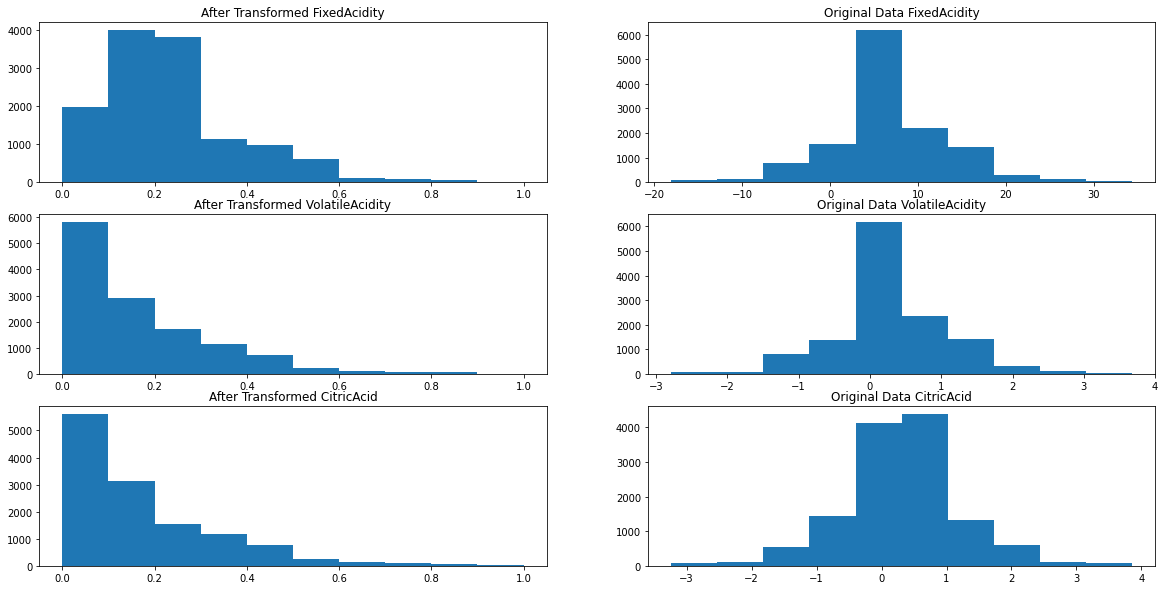

In [20]:
# create graph with new graph
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.hist(df['FixedAcidity'])
plt.title('After Transformed FixedAcidity')

plt.subplot(3,2,2)
plt.hist(original_df['FixedAcidity'])
plt.title('Original Data FixedAcidity')

plt.subplot(3, 2, 3)
plt.hist(df['VolatileAcidity'])
plt.title('After Transformed VolatileAcidity')

plt.subplot(3, 2, 4)
plt.hist(original_df['VolatileAcidity'])
plt.title('Original Data VolatileAcidity')

plt.subplot(3, 2, 5)
plt.hist(df['CitricAcid'])
plt.title('After Transformed CitricAcid')

plt.subplot(3, 2, 6)
plt.hist(original_df['CitricAcid'])
plt.title('Original Data CitricAcid')


From the above graph, it shows that data after is transformed, and the distance between two endpoints is shortened.

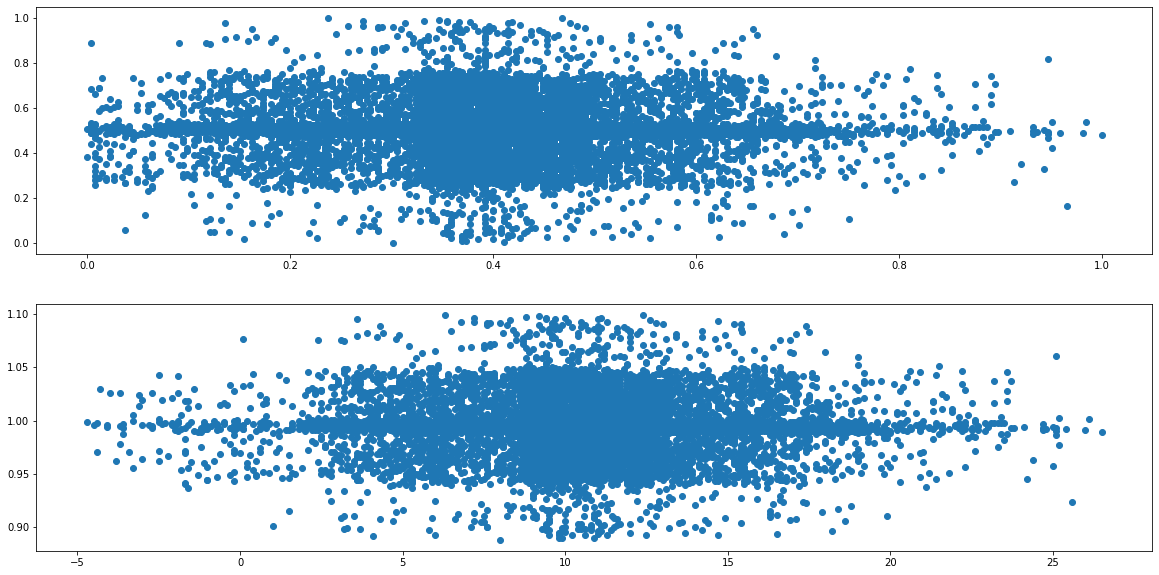

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(df['Alcohol'],df['Density'])

plt.subplot(2,1,2)
plt.scatter(original_df['Alcohol'],original_df['Density'])

The above graph shows the graph is identical, but the number range is shortened.

#### Conclusion

In the beginning, there are so many missing values in columns, and there is also some negative value in some of the columns. I use the abs function to turn those values into positive ones. Each attribute does not have a relationship with the others.  After data transformation, the graphs are identical but data is in the range of 0 to 1. This helps data that can fit into machine learning models.